In [1]:
# CSU Stanislaus Data Visualization Workshop (Apr 12, 2019) 
# R language
# Written by Sabah Ul-Hasan

# 1:10 - 1:40 PM (Arrive with laptop) 
# Corresponding Github: https://sabahzero.github.io/dataviz/  
# Workshop co-facilitated with Nicholas Dove 

# To replicate, 
# a) Download Jupyter notebook and R kernel (otherwise it will only recognize if in python)
# or b) Reproduce directly in R (using RStudio, if real-time visualization desired

In [2]:
# The following tutorial (aims)

# 1) Creates a data set 
# 2) Investigates the data we create 
# 3) Produces an initial bar chart
# 4) Adjust the bar chart based on data visualization principles 

In [3]:
# 1) Create a data set 

# Let's make a dataset based on human height vs age
Humans <- data.frame( # This names our dataset as "Humans", the data.frame() function makes it a dataset over a matrix or list
    Individual=c(1:10), # This makes a column for each Individual, 1 - 10
    Height=c("Tall", "Medium", "Short","Tall", "Medium", "Short","Tall", "Medium", "Short","Tall"),
    # This makes a column for the category of each individual's height. Note there is a faster way of doing this
    Age=floor(rnorm(10,mean=30,sd=5)) # This randomly selects 10 numbers with a mean of 30 and standard deviation of 5
    # floor() makes sure the output are integers
    # rnorm() makes sure the output is normally distributed
) 

# Let's see if it worked
head(Humans) # Notice Head lists the first 6 rows, what if we want to see all 10?

Individual,Height,Age
1,Tall,24
2,Medium,25
3,Short,33
4,Tall,26
5,Medium,34
6,Short,31


In [4]:
# 2) Investigate the data we created

Humans # Now we can see the entire data set

# Let's create a data set that averages these values for our bar chart

# Height = Short, Medium, Tall
# Mean Age
# Standard Deviation of Age

library(dplyr) # We will need this package for identifying means and standard deviations by category 

Humans_Summary <- Humans %>% # Creates a new dataset called "Humans Summary"
group_by(Height) %>% # Groups by Height
summarise(Mean_Age = mean(Age), SD_Age = sd(Age)) # Summarizes mean age and standard deviation

print("Summary data of Human Height")
Humans_Summary # View the updates version

Individual,Height,Age
1,Tall,24
2,Medium,25
3,Short,33
4,Tall,26
5,Medium,34
6,Short,31
7,Tall,26
8,Medium,24
9,Short,29
10,Tall,34



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "Summary data of Human Height"


Height,Mean_Age,SD_Age
Medium,27.66667,5.507571
Short,31.00000,2.000000
Tall,27.50000,4.434712


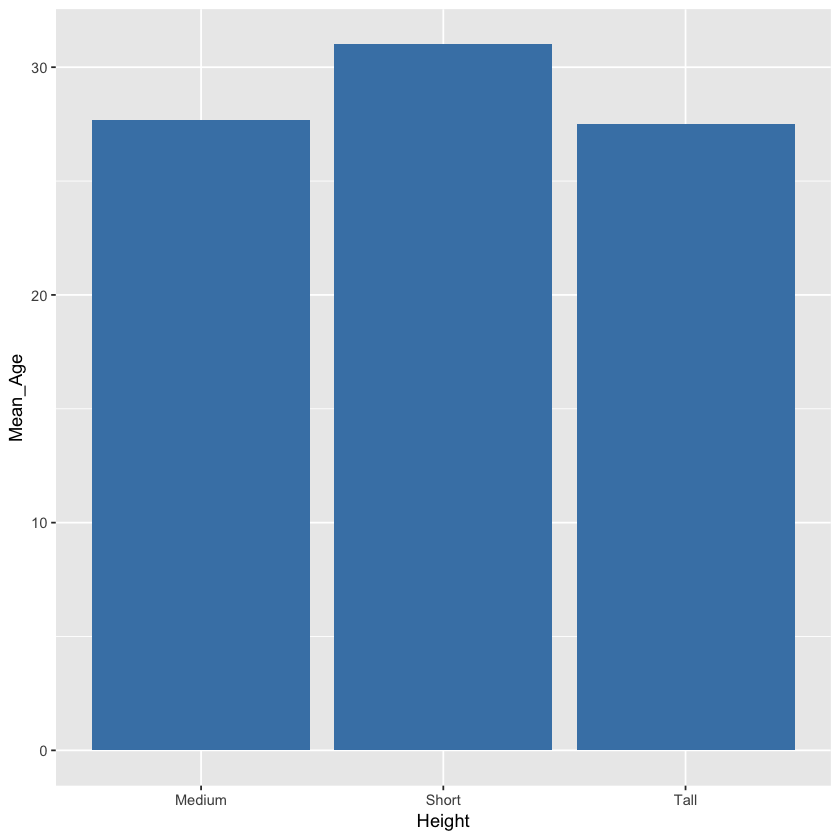

In [5]:
# 3) Produce an initial bar chart

library("ggplot2")

Plot = ggplot( # ggplot () allows us to plot the data 
    data=Humans_Summary, # We want to tell the function what data frame to use
    aes(x=Height, y=Mean_Age)) + # We want to tell the function what to define for x and y axes
  geom_bar(stat="identity", fill="steelblue") # geom_bar() is what will make this a bar chart, colored blue

Plot

# How can we make this better?

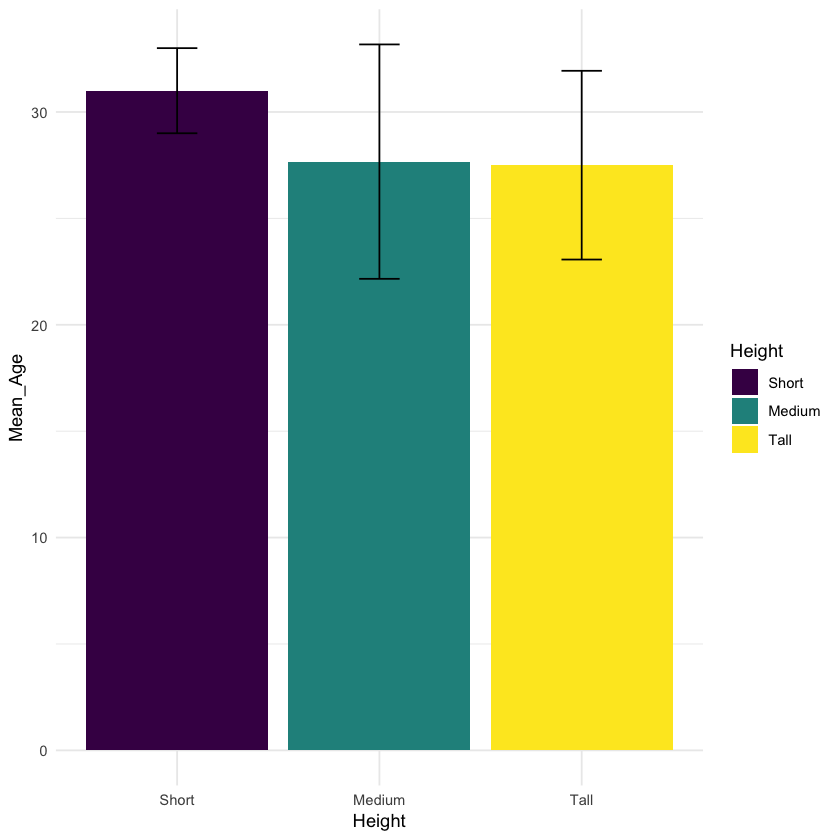

In [6]:
# 4) Adjust the bar chart based on data visualization principles 

Humans_Summary$Height <- ordered(Humans_Summary$Height,levels=c('Short','Medium','Tall')) # Re-order heights

Plot_New <- ggplot(Humans_Summary, 
                   aes(x=Height, y=Mean_Age, fill=Height)) + 
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=Mean_Age-SD_Age, ymax=Mean_Age+SD_Age), 
              width=.2,
              position=position_dodge(.9))

Plot_New + theme_minimal()

Saving 7 x 7 in image


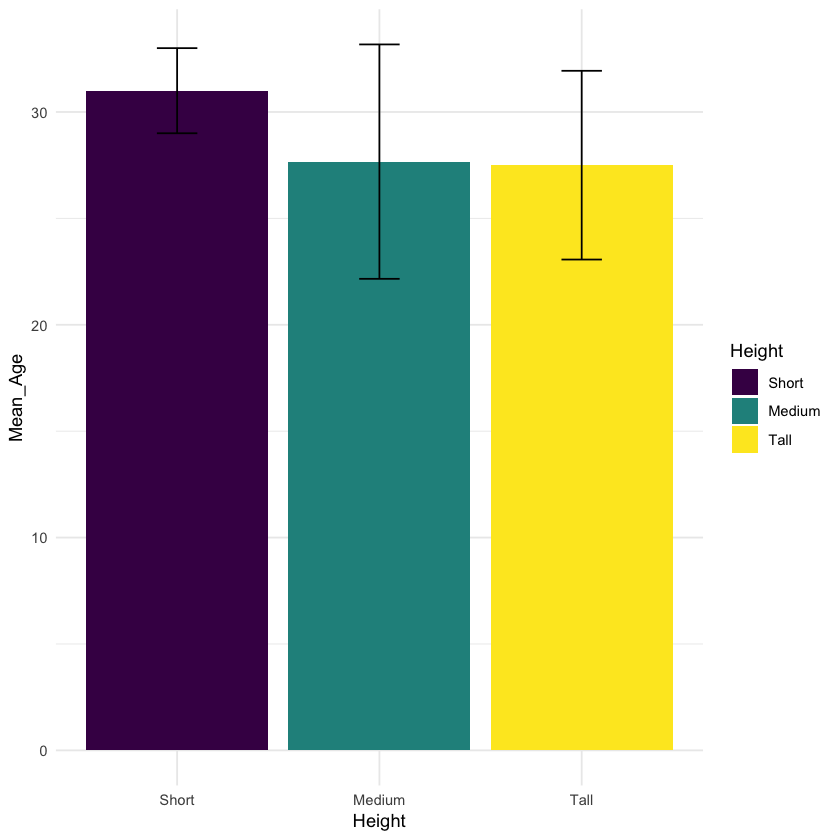

In [7]:
Plot_New + theme_minimal()

ggsave("Mean_Age.png", dpi = 800) # Saves as a figure on your personal computer